In [1]:
import zipfile

# Download zip file of pizza_steak images
#!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [2]:
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [3]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [4]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img


Image shape: (512, 382, 3)


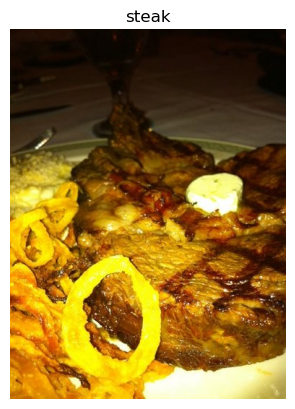

In [6]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")

In [7]:
import tensorflow as tf
tf.constant(img)

2023-11-03 17:44:44.346843: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-11-03 17:44:44.346869: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-11-03 17:44:44.346876: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-11-03 17:44:44.347076: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-11-03 17:44:44.347240: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


<tf.Tensor: shape=(512, 382, 3), dtype=uint8, numpy=
array([[[ 24,   7,   0],
        [ 25,   8,   0],
        [ 27,  10,   2],
        ...,
        [ 12,   9,   0],
        [ 10,  10,   0],
        [ 10,  10,   0]],

       [[ 23,   6,   0],
        [ 24,   7,   0],
        [ 25,   8,   0],
        ...,
        [ 11,   8,   0],
        [ 11,   8,   0],
        [  9,   9,   0]],

       [[ 23,   6,   0],
        [ 24,   7,   0],
        [ 25,   8,   0],
        ...,
        [ 12,   8,   0],
        [ 12,   8,   0],
        [ 11,   8,   0]],

       ...,

       [[197, 122,   7],
        [197, 122,   7],
        [197, 120,   6],
        ...,
        [170, 158,  72],
        [170, 160,  73],
        [170, 160,  73]],

       [[193, 119,   0],
        [195, 121,   0],
        [198, 122,   2],
        ...,
        [172, 160,  74],
        [172, 162,  77],
        [170, 162,  77]],

       [[190, 116,   0],
        [193, 119,   0],
        [196, 120,   0],
        ...,
        [172, 162,  7

In [8]:
img.shape # width, height, colour channels

(512, 382, 3)

In [9]:
# get all the balue in 0 & 1
img / 255.

array([[[0.09411765, 0.02745098, 0.        ],
        [0.09803922, 0.03137255, 0.        ],
        [0.10588235, 0.03921569, 0.00784314],
        ...,
        [0.04705882, 0.03529412, 0.        ],
        [0.03921569, 0.03921569, 0.        ],
        [0.03921569, 0.03921569, 0.        ]],

       [[0.09019608, 0.02352941, 0.        ],
        [0.09411765, 0.02745098, 0.        ],
        [0.09803922, 0.03137255, 0.        ],
        ...,
        [0.04313725, 0.03137255, 0.        ],
        [0.04313725, 0.03137255, 0.        ],
        [0.03529412, 0.03529412, 0.        ]],

       [[0.09019608, 0.02352941, 0.        ],
        [0.09411765, 0.02745098, 0.        ],
        [0.09803922, 0.03137255, 0.        ],
        ...,
        [0.04705882, 0.03137255, 0.        ],
        [0.04705882, 0.03137255, 0.        ],
        [0.04313725, 0.03137255, 0.        ]],

       ...,

       [[0.77254902, 0.47843137, 0.02745098],
        [0.77254902, 0.47843137, 0.02745098],
        [0.77254902, 0

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# set a path from our current directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)



# build cnn model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3,
                           activation='relu',
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])


# label and data created for us using flow_from_directory
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data), # total img / batch_size = total steps for machine to know and memory calculation for storing
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5


2023-11-03 17:44:45.687202: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


47/47 [==============================] - 13s 212ms/step - loss: 0.5810 - accuracy: 0.6693 - val_loss: 0.3837 - val_accuracy: 0.8220
Epoch 2/5
47/47 [==============================] - 5s 109ms/step - loss: 0.4325 - accuracy: 0.8113 - val_loss: 0.3529 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 5s 105ms/step - loss: 0.3981 - accuracy: 0.8300 - val_loss: 0.3654 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 5s 107ms/step - loss: 0.3352 - accuracy: 0.8600 - val_loss: 0.3165 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 6s 124ms/step - loss: 0.2776 - accuracy: 0.8920 - val_loss: 0.3591 - val_accuracy: 0.8420


## Update in tensorflow

below you can see we have used ImageDataGenerator which has been updated to image_dataset_from_directory of tf.keras.utils.

The main differences between them are:

*   rescaling & data loading:
    

  1.   In `ImageDataGenerator` we rescaled imag then applied flow_from_directory, we used **target_size** and **class_mode**
  2.   In `image_dataset_from_directory` we got the data from directory using **image_size** and **label_mode** which are used same as *target_size* and *class_mode*. here, to rescale image we have added new layer in Sequential Model:

```
tf.keras.layers.Rescaling(1./255,input_shape=(224,224,3)),
```






In [11]:
from tensorflow.keras.utils import image_dataset_from_directory

tf.random.set_seed(42)


# set a path from our current directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_data = image_dataset_from_directory(directory=train_dir,
                                               batch_size=32,
                                               image_size = (224,224),
                                               label_mode="binary",
                                               seed=42)

valid_data = image_dataset_from_directory(directory=test_dir,
                                               batch_size=32,
                                               image_size = (224,224),
                                               label_mode="binary",
                                               seed=42)

# build cnn model
model_1_new = tf.keras.models.Sequential([

    tf.keras.layers.Rescaling(1./255,input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_1_new.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])


# label and data created for us using flow_from_directory
history_1_new = model_1_new.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data), # total img / batch_size = total steps for machine to know and memory calculation for storing
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 13s 202ms/step - loss: 0.6546 - accuracy: 0.6073 - val_loss: 0.5020 - val_accuracy: 0.7460
Epoch 2/5
47/47 [==============================] - 6s 116ms/step - loss: 0.4536 - accuracy: 0.8040 - val_loss: 0.4093 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 6s 116ms/step - loss: 0.4127 - accuracy: 0.8180 - val_loss: 0.3149 - val_accuracy: 0.8680
Epoch 4/5
47/47 [==============================] - 6s 124ms/step - loss: 0.3831 - accuracy: 0.8313 - val_loss: 0.3025 - val_accuracy: 0.8780
Epoch 5/5
47/47 [==============================] - 6s 114ms/step - loss: 0.3666 - accuracy: 0.8427 - val_loss: 0.3193 - val_accuracy: 0.8540


In [12]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data), # total img / batch_size = total steps for machine to know and memory calculation for storing
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 92ms/step - loss: 74272.9141 - accuracy: 0.4980 - val_loss: 82617.1016 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 1s 27ms/step - loss: 71010.6406 - accuracy: 0.5000 - val_loss: 60437.6250 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 1s 24ms/step - loss: 48358.3477 - accuracy: 0.5000 - val_loss: 36903.4766 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 1s 25ms/step - loss: 24626.3008 - accuracy: 0.5000 - val_loss: 12266.6318 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 1s 28ms/step - loss: 3407.9636 - accuracy: 0.5087 - val_loss: 333.7945 - val_accuracy: 0.5000


In [13]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, Rescaling
from tensorflow.keras import Sequential

In [14]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Rescaling(1./255,input_shape=(224,224,3)),  
  Conv2D(filters=10,
         kernel_size=3,
         strides=1,
         padding='valid',
         activation='relu'), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(1, activation='sigmoid') # output layer (specify output shape)
])

# Compile the model
model_4.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5


2023-11-03 17:46:09.365656: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


47/47 [==============================] - 13s 224ms/step - loss: 0.9662 - accuracy: 0.6867 - val_loss: 0.4414 - val_accuracy: 0.8080
Epoch 2/5
47/47 [==============================] - 10s 208ms/step - loss: 0.4350 - accuracy: 0.8133 - val_loss: 0.4427 - val_accuracy: 0.7800
Epoch 3/5
47/47 [==============================] - 8s 156ms/step - loss: 0.3361 - accuracy: 0.8580 - val_loss: 0.3967 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 7s 133ms/step - loss: 0.1924 - accuracy: 0.9313 - val_loss: 0.4523 - val_accuracy: 0.8100
Epoch 5/5
47/47 [==============================] - 7s 135ms/step - loss: 0.0644 - accuracy: 0.9827 - val_loss: 0.5798 - val_accuracy: 0.7840


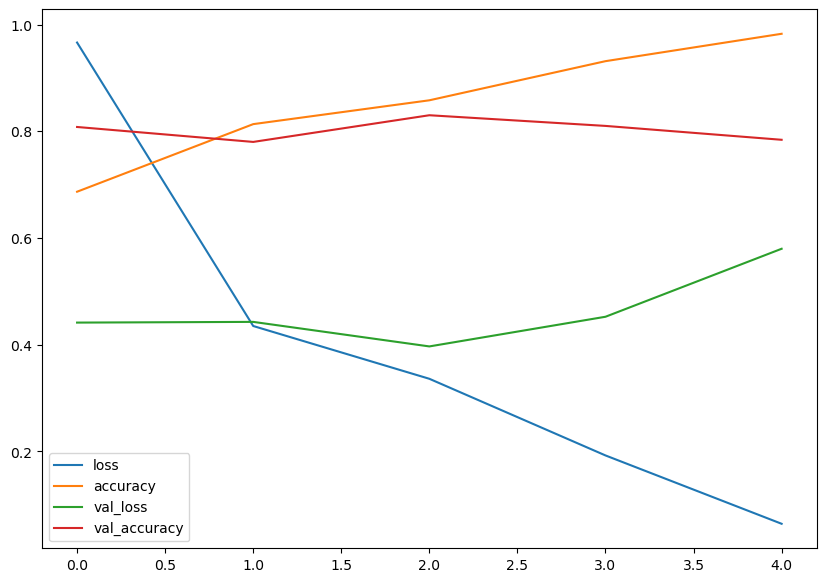

In [15]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [16]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

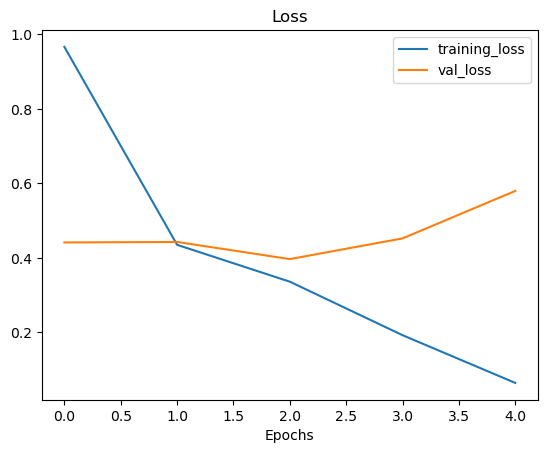

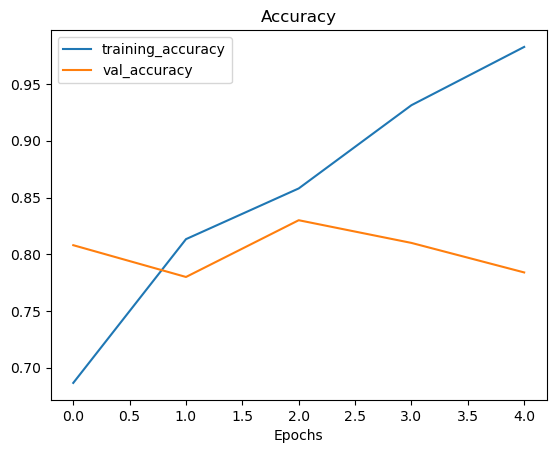

In [17]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)

In [18]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_10 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_5 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 47734

In [19]:
train_data = image_dataset_from_directory(directory=train_dir,
                                               batch_size=32,
                                               image_size = (224,224),
                                               label_mode="binary",
                                               seed=42)

test_data = image_dataset_from_directory(directory=test_dir,
                                               batch_size=32,
                                               image_size = (224,224),
                                               label_mode="binary",
                                               seed=42)

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [20]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_5 = Sequential([
  Rescaling(1./255,input_shape=(224,224,3)), 
    
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(pool_size=2), # reduce number of features by half
    
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
    
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
    
  Flatten(),
    
  Dense(1, activation='sigmoid')
])

# Compile model (same as model_4)
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 169ms/step - loss: 0.6725 - accuracy: 0.5867 - val_loss: 0.5868 - val_accuracy: 0.7220
Epoch 2/5
47/47 [==============================] - 4s 76ms/step - loss: 0.5268 - accuracy: 0.7573 - val_loss: 0.4790 - val_accuracy: 0.7600
Epoch 3/5
47/47 [==============================] - 4s 89ms/step - loss: 0.4770 - accuracy: 0.7847 - val_loss: 0.4213 - val_accuracy: 0.8100
Epoch 4/5
47/47 [==============================] - 5s 93ms/step - loss: 0.4248 - accuracy: 0.8100 - val_loss: 0.3759 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 5s 96ms/step - loss: 0.4313 - accuracy: 0.8113 - val_loss: 0.3708 - val_accuracy: 0.8440


In [21]:
# Check out the model architecture
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 52, 52, 10)       

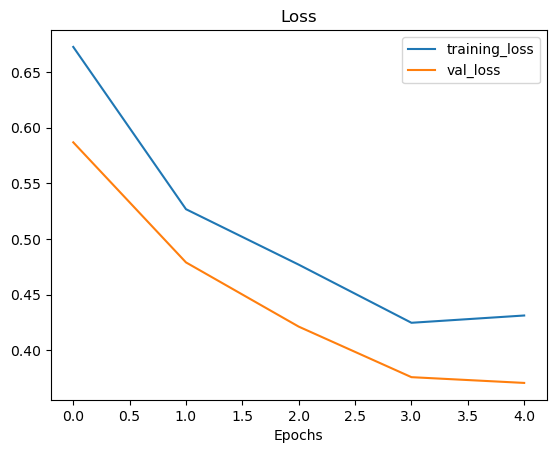

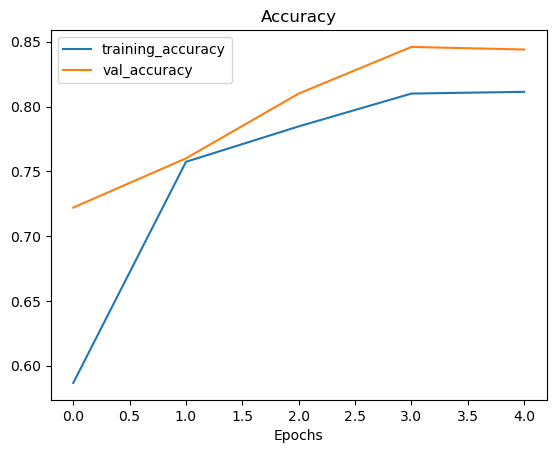

In [22]:
plot_loss_curves(history_5)

In [23]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [24]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Augmented training images:
Found 1500 images belonging to 2 classes.
Non-augmented training images:
Found 1500 images belonging to 2 classes.
Unchanged test images:
Found 500 images belonging to 2 classes.


In [25]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

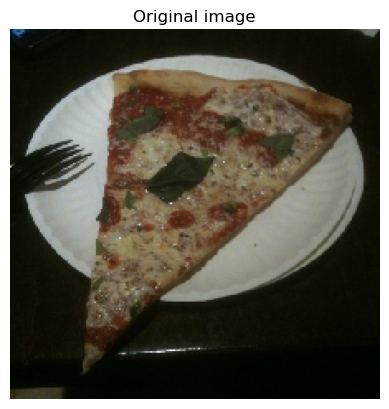

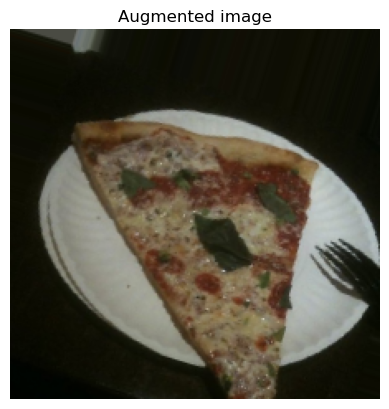

In [26]:
# Show original image and augmented image
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis("off")
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis("off");

In [27]:
# Create the model (same as model_5)
model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5


2023-11-03 17:47:24.835587: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


47/47 [==============================] - 17s 303ms/step - loss: 0.7427 - accuracy: 0.5167 - val_loss: 0.7064 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 12s 250ms/step - loss: 0.6949 - accuracy: 0.4993 - val_loss: 0.6908 - val_accuracy: 0.5020
Epoch 3/5
47/47 [==============================] - 11s 225ms/step - loss: 0.6918 - accuracy: 0.5187 - val_loss: 0.6866 - val_accuracy: 0.5880
Epoch 4/5
47/47 [==============================] - 11s 224ms/step - loss: 0.6946 - accuracy: 0.5173 - val_loss: 0.6798 - val_accuracy: 0.5460
Epoch 5/5
47/47 [==============================] - 11s 225ms/step - loss: 0.6862 - accuracy: 0.5427 - val_loss: 0.6608 - val_accuracy: 0.7020


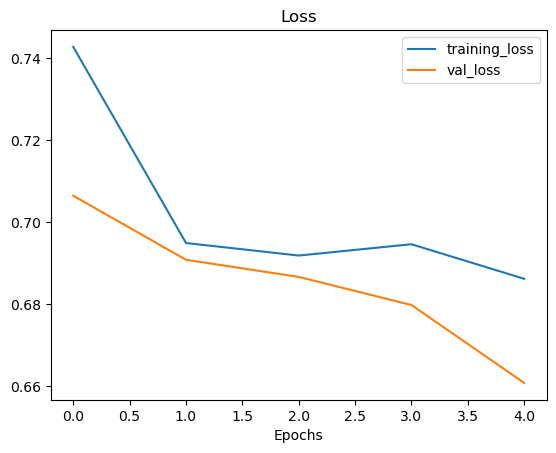

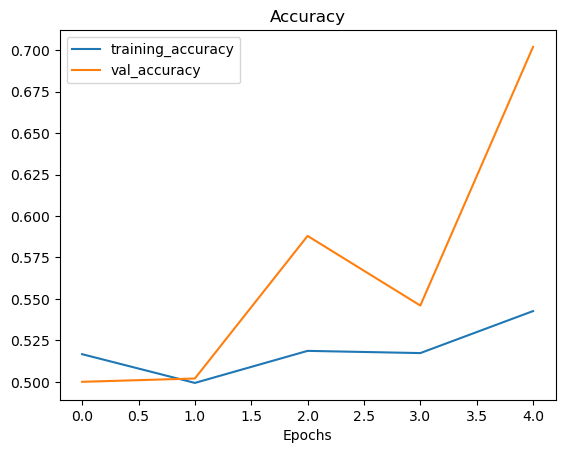

In [28]:
# Check model's performance history training on augmented data
plot_loss_curves(history_6)

In [29]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True) # Shuffle data (default)

Found 1500 images belonging to 2 classes.


In [30]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # now the augmented data is shuffled
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5


2023-11-03 17:48:26.393393: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


47/47 [==============================] - 17s 298ms/step - loss: 0.6779 - accuracy: 0.5687 - val_loss: 0.6044 - val_accuracy: 0.6640
Epoch 2/5
47/47 [==============================] - 11s 226ms/step - loss: 0.5807 - accuracy: 0.7193 - val_loss: 0.4486 - val_accuracy: 0.8020
Epoch 3/5
47/47 [==============================] - 11s 234ms/step - loss: 0.5264 - accuracy: 0.7573 - val_loss: 0.4085 - val_accuracy: 0.8340
Epoch 4/5
47/47 [==============================] - 11s 230ms/step - loss: 0.5097 - accuracy: 0.7660 - val_loss: 0.3756 - val_accuracy: 0.8120
Epoch 5/5
47/47 [==============================] - 11s 234ms/step - loss: 0.4988 - accuracy: 0.7593 - val_loss: 0.4740 - val_accuracy: 0.7540


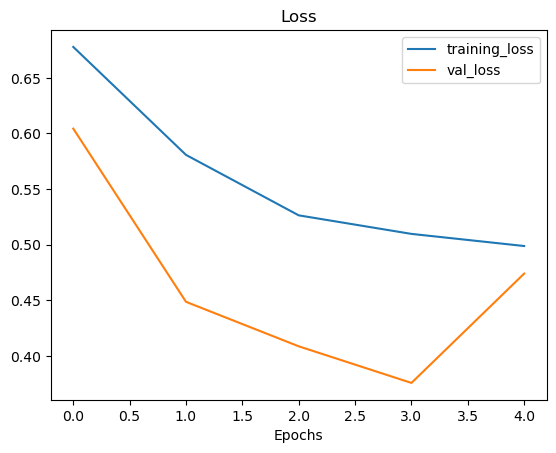

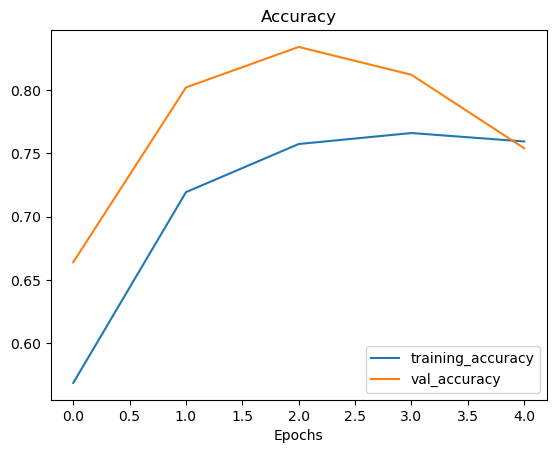

In [31]:
plot_loss_curves(history_7)

In [32]:
# Create a CNN model (same as Tiny VGG but for binary classification - https://poloclub.github.io/cnn-explainer/ )
model_8 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])

# Fit the model
history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 18s 321ms/step - loss: 0.6777 - accuracy: 0.5460 - val_loss: 0.5594 - val_accuracy: 0.6880
Epoch 2/5
47/47 [==============================] - 12s 250ms/step - loss: 0.6040 - accuracy: 0.6973 - val_loss: 0.4974 - val_accuracy: 0.7820
Epoch 3/5
47/47 [==============================] - 12s 260ms/step - loss: 0.5538 - accuracy: 0.7320 - val_loss: 0.4262 - val_accuracy: 0.8200
Epoch 4/5
47/47 [==============================] - 12s 247ms/step - loss: 0.5343 - accuracy: 0.7420 - val_loss: 0.4189 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 11s 236ms/step - loss: 0.5018 - accuracy: 0.7647 - val_loss: 0.3766 - val_accuracy: 0.8240


In [33]:
# Check model_8 architecture (same as model_1)
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_21 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 110, 110, 10)      0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_23 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 53, 53, 10)        0         
 ng2D)                                                

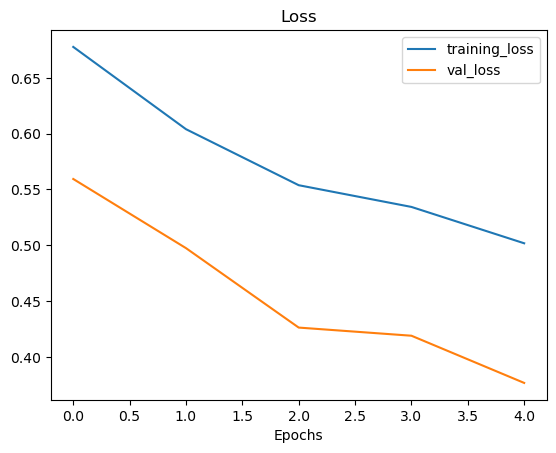

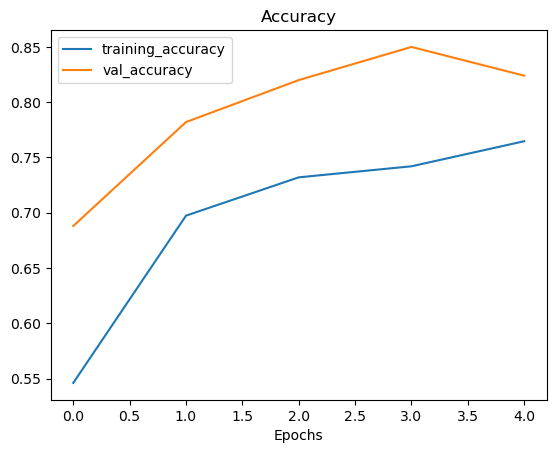

In [34]:
# Check out the TinyVGG model performance
plot_loss_curves(history_8)

In [35]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


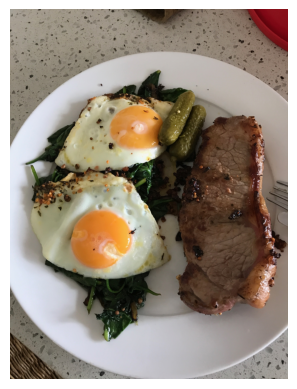

In [36]:
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [37]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [38]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [39]:
# Add an extra axis
print(f"Shape before new dimension: {steak.shape}")
steak = tf.expand_dims(steak, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {steak.shape}")
steak

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [40]:
# Make a prediction on custom image tensor
pred = model_8.predict(steak)
pred

1/1 [==============================] - 0s 403ms/step


array([[0.72888136]], dtype=float32)

In [41]:
# We can index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [42]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 13ms/step


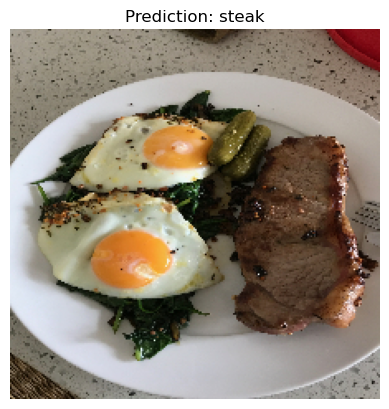

In [43]:
# Test our model on a custom image
pred_and_plot(model_8, "03-steak.jpeg", class_names)

1/1 [==============================] - 0s 12ms/step


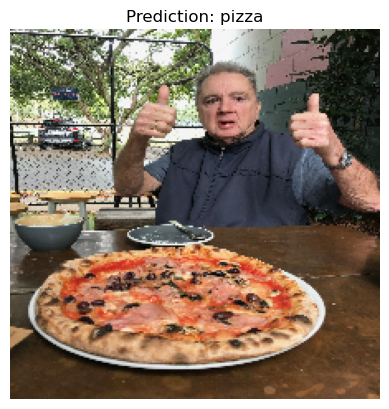

In [44]:
# Download another test image and make a prediction on it
#!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_8, "03-pizza-dad.jpeg", class_names)

In [45]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
#!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [46]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 

In [47]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [48]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (340, 512, 3)


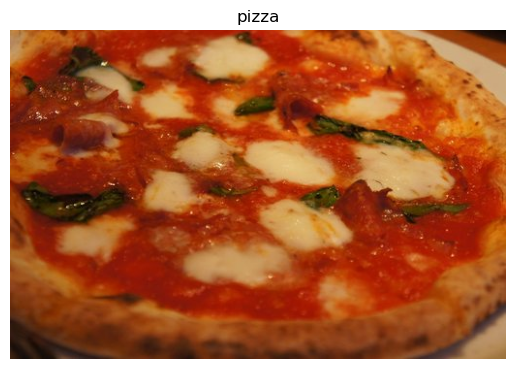

In [49]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

In [50]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [51]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_9.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=["accuracy"])

In [52]:
# Fit the model
history_9 = model_9.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 42s 167ms/step - loss: 2.2292 - accuracy: 0.1575 - val_loss: 2.1388 - val_accuracy: 0.2124
Epoch 2/5
235/235 [==============================] - 32s 137ms/step - loss: 2.0629 - accuracy: 0.2545 - val_loss: 1.9751 - val_accuracy: 0.2932
Epoch 3/5
235/235 [==============================] - 32s 136ms/step - loss: 1.7656 - accuracy: 0.3920 - val_loss: 1.9583 - val_accuracy: 0.3172
Epoch 4/5
235/235 [==============================] - 32s 137ms/step - loss: 1.2454 - accuracy: 0.5883 - val_loss: 2.1475 - val_accuracy: 0.3028
Epoch 5/5
235/235 [==============================] - 32s 138ms/step - loss: 0.6266 - accuracy: 0.8061 - val_loss: 3.0618 - val_accuracy: 0.2968


In [53]:
# Evaluate on the test data
model_9.evaluate(test_data)

79/79 [==============================] - 5s 57ms/step - loss: 3.0618 - accuracy: 0.2968


[3.061835289001465, 0.29679998755455017]

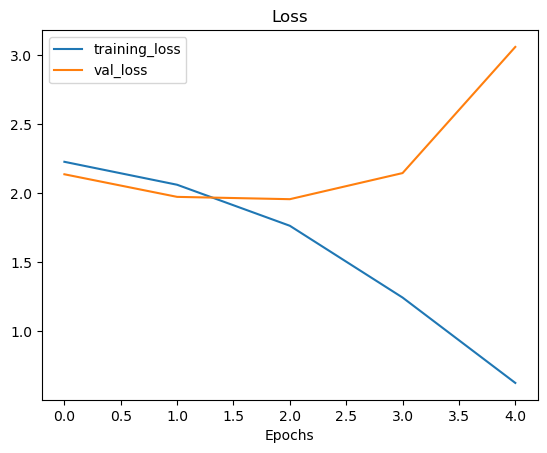

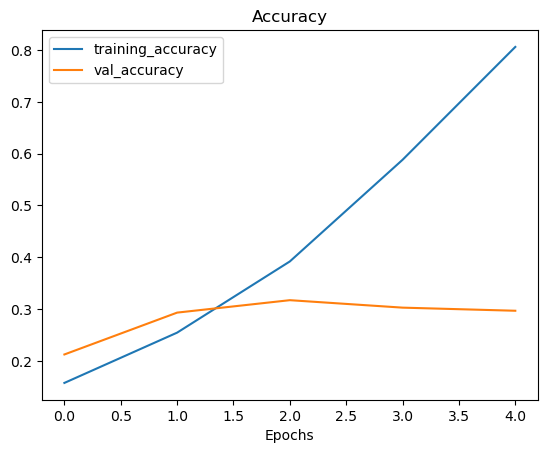

In [54]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(history_9)

In [55]:
# Try a simplified model (removed two layers)
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.legacy.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 29s 117ms/step - loss: 2.0999 - accuracy: 0.2401 - val_loss: 1.9255 - val_accuracy: 0.3268
Epoch 2/5
235/235 [==============================] - 25s 106ms/step - loss: 1.7402 - accuracy: 0.4037 - val_loss: 1.8626 - val_accuracy: 0.3720
Epoch 3/5
235/235 [==============================] - 25s 107ms/step - loss: 1.2745 - accuracy: 0.5825 - val_loss: 1.9263 - val_accuracy: 0.3492
Epoch 4/5
235/235 [==============================] - 25s 106ms/step - loss: 0.7563 - accuracy: 0.7705 - val_loss: 2.2507 - val_accuracy: 0.3384
Epoch 5/5
235/235 [==============================] - 26s 110ms/step - loss: 0.3828 - accuracy: 0.8981 - val_loss: 2.7097 - val_accuracy: 0.3288


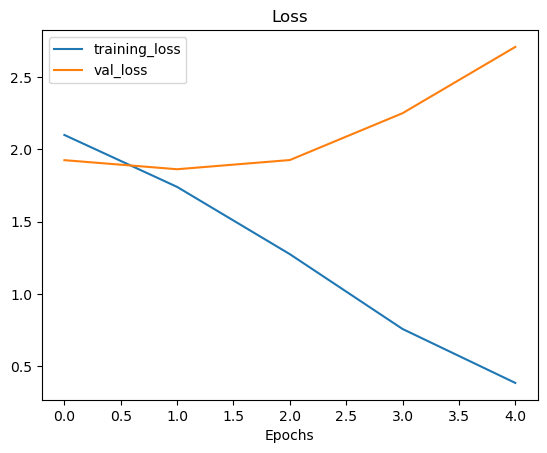

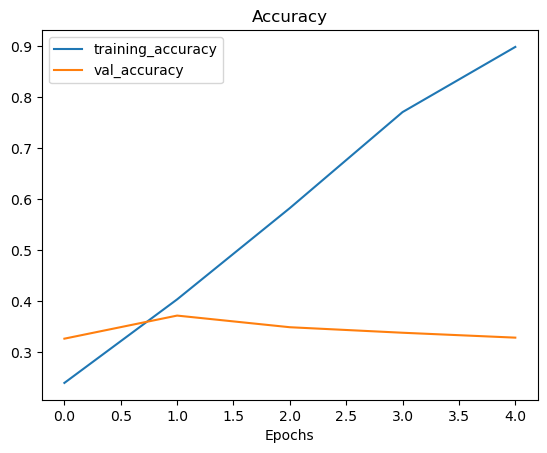

In [56]:
# Check out the loss curves of model_10
plot_loss_curves(history_10)

In [57]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [58]:
# Clone the model (use the same architecture)
model_11 = tf.keras.models.clone_model(model_10)

# Compile the cloned model (same setup as used for model_10)
model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.legacy.Adam(),
              metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 64s 264ms/step - loss: 2.2599 - accuracy: 0.1967 - val_loss: 2.0137 - val_accuracy: 0.2708
Epoch 2/5
235/235 [==============================] - 58s 245ms/step - loss: 2.0699 - accuracy: 0.2596 - val_loss: 1.9301 - val_accuracy: 0.3184
Epoch 3/5
235/235 [==============================] - 55s 233ms/step - loss: 2.0183 - accuracy: 0.2935 - val_loss: 1.8689 - val_accuracy: 0.3484
Epoch 4/5
235/235 [==============================] - 51s 216ms/step - loss: 1.9832 - accuracy: 0.3071 - val_loss: 1.8368 - val_accuracy: 0.3712
Epoch 5/5
235/235 [==============================] - 51s 215ms/step - loss: 1.9537 - accuracy: 0.3207 - val_loss: 1.7853 - val_accuracy: 0.3912


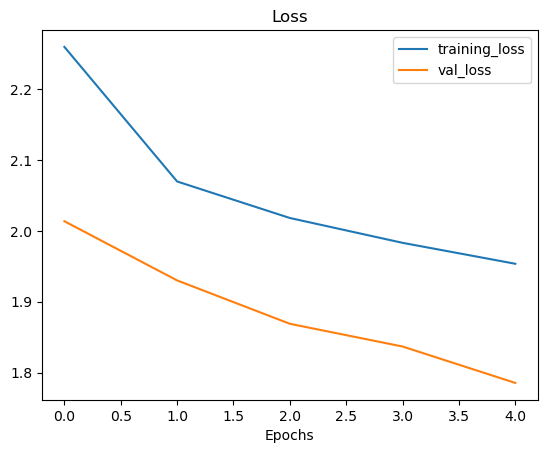

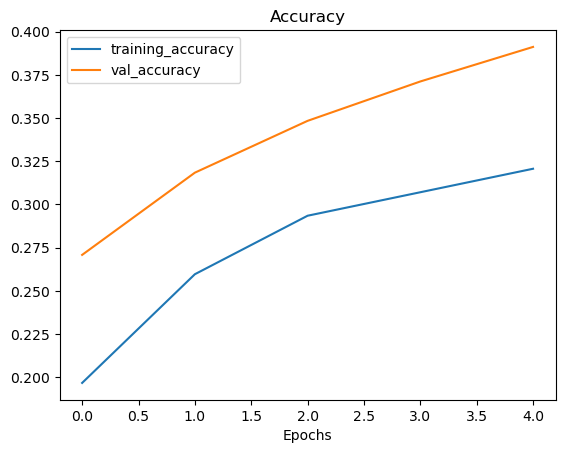

In [59]:
# Check out our model's performance with augmented data
plot_loss_curves(history_11)

In [60]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 495ms/step


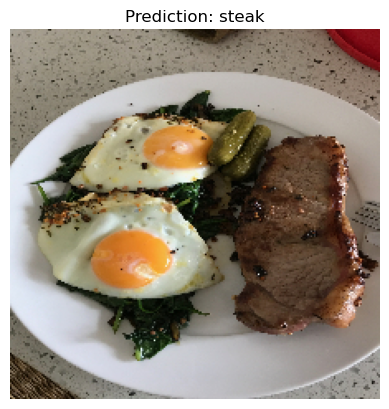

In [61]:
pred_and_plot(model_11, "03-steak.jpeg", class_names)

In [68]:
img = load_and_prep_image("03-steak.jpeg")
pp = model_11.predict(tf.expand_dims(img, axis=0))
pp,pp.argmax(), class_names[pp.argmax()]

1/1 [==============================] - 0s 13ms/step


(array([[0.03292451, 0.03501897, 0.0995284 , 0.19188856, 0.14570333,
         0.06571989, 0.01884582, 0.11802488, 0.2527041 , 0.03964148]],
       dtype=float32),
 8,
 'steak')